In [1]:
import numpy as np
%matplotlib notebook
import pylab as plt
import pickle as pickle

import networkx as nx

from NAQ_graphs import NAQ

#for automatic graph generation
import yaml as yaml
from graph_generator import generate_graph
import os as os

<IPython.core.display.Javascript object>


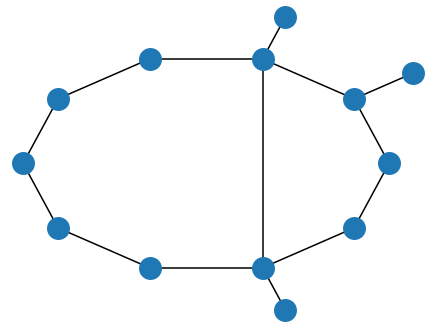

In [2]:
#create a small world network, using automatic generation, see generate_graph and graph_params for more

graph_tpe = 'SM'
params = yaml.load(open('graph_params.yaml','rb'))[graph_tpe]

G, pos  = generate_graph(tpe=graph_tpe, params = params)

if not os.path.isdir(graph_tpe):
    os.mkdir(graph_tpe)
os.chdir(graph_tpe)

#plot the graph
plt.figure(figsize=(4,3))
nx.draw(G, pos=pos, node_size=200)

In [3]:
#setup the main object
chi = np.array([ 1.j for i in range(len(G.edges))])

naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1', open_graph = True)

naq_u1.n_processes_scan = 4 #number of CPU to use

#random update
naq_u1.update_chi([1.,1.])

#construct the graph laplacian
naq_u1.update_laplacian()

In [4]:
#load the modes found in test_NAQ_U1_open.ipynb
modes = pickle.load(open('modes.pkl', 'rb'))
Ks, Alphas, s = pickle.load( open('scan.pkl', 'rb'))

<IPython.core.display.Javascript object>


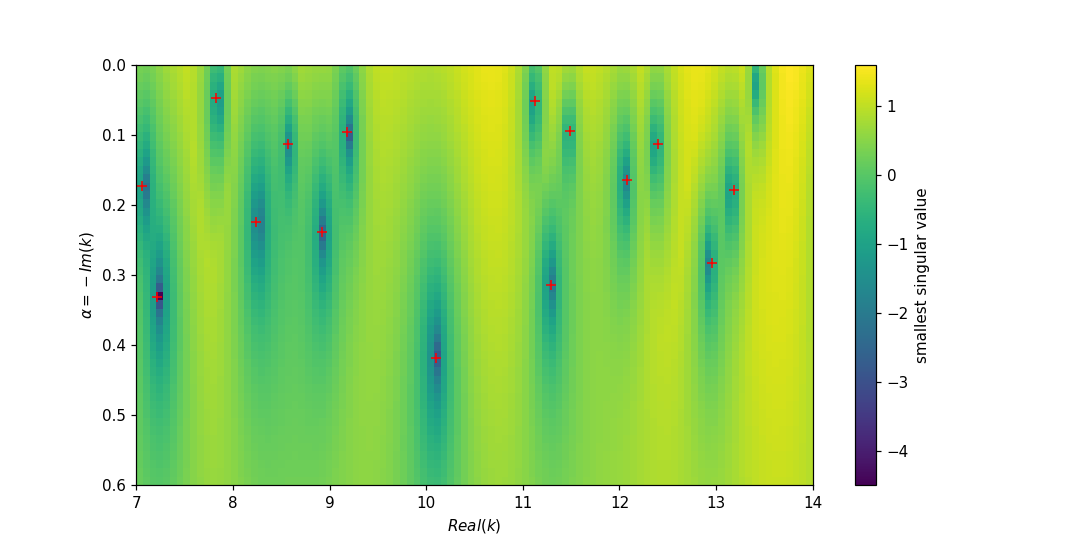

In [6]:
#plot the scan and modes
naq_u1.plot_scan(Ks,Alphas,s,modes)


In [7]:
#pump parameters (see SALT papers)
naq_u1.pump_params = {}
naq_u1.pump_params['gamma_perp'] = 1.
naq_u1.pump_params['k_a']        = 10.
naq_u1.pump_params['D0']         = 0 
naq_u1.pump_params['edges']      = [0, 1, 2,]  #edges to pump

m = 0
naq_u1.update_chi(modes[m])
print("condition number no pump:", naq_u1.test_laplacian())

naq_u1.pump_params['D0']         = 1e-2
naq_u1.update_chi(modes[m])
print("condition number with pump:", naq_u1.test_laplacian())


condition number no pump: 6.5921054e-06
condition number with pump: 0.082132764


In [8]:
#find the pump trajectories
params['s_size']    = 1e-2*np.asarray([1.,1.])

#the correct balaance between s_size and the D0 steps must be found for each graph/pump
D0_max = .1

%time new_modes = naq_u1.pump_trajectories(modes, params, D0_max = D0_max, D0_steps = 20)

D0: 0.005263157894736842
D0: 0.010526315789473684
D0: 0.015789473684210527
D0: 0.021052631578947368
D0: 0.02631578947368421
D0: 0.031578947368421054
D0: 0.03684210526315789
D0: 0.042105263157894736
D0: 0.04736842105263158
D0: 0.05263157894736842
D0: 0.05789473684210526
D0: 0.06315789473684211
D0: 0.06842105263157895
D0: 0.07368421052631578
D0: 0.07894736842105263
Could not update a mode, use smaller D0 steps!
D0: 0.08421052631578947
D0: 0.08947368421052632
Could not update a mode, use smaller D0 steps!
D0: 0.09473684210526316
D0: 0.1
Could not update a mode, use smaller D0 steps!
CPU times: user 2.12 s, sys: 303 ms, total: 2.43 s
Wall time: 47.1 s


<IPython.core.display.Javascript object>


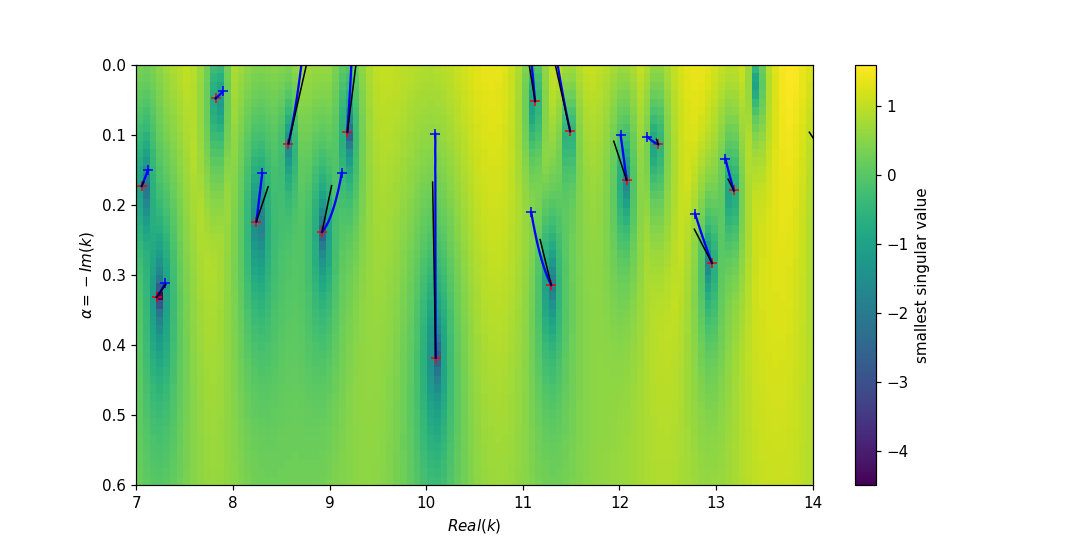

In [9]:
#plot the pump trajectories
naq_u1.plot_pump_traj(Ks, Alphas, s, modes, new_modes)
